#IP - Experiment no. 03 : IMAGE ENHANCEMENT

- Name: Sachi Shah
- Batch: EB1

Aim: <br>
1. For the given test image, apply power law transformation with gamma <br>
2. For the given low contrast image, apply thresholding and contrast stretching point processing techniques to enhance the image.

In [ ]:
# Import libraries
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

## Power-law (gamma) transformations can be mathematically expressed as $s = cr^{\gamma}$

 Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings. <br>
 If, s is the output intensity, an r is the input intensity of the pixel, and $\gamma$ is the intensity correction factor


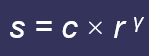

Text(0.5, 1.0, 'Modified Image')

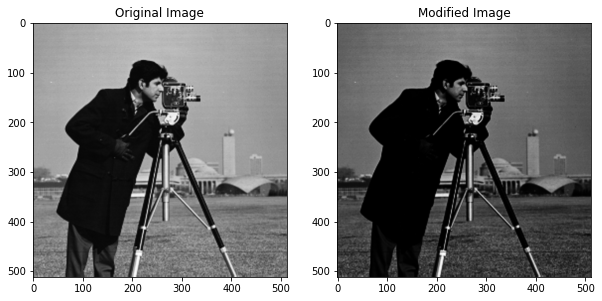

In [ ]:
# read the cameraman.tif image as img
img = io.imread('cameraman.tif')    
img_copy = img.copy()

gamma = 2
r,c = img_copy.shape
for i in range(r):
    for j in range(c):
        img_copy[i,j] = ((img_copy[i,j]/255) ** gamma) *255  #Normalize so that value does not exceed 255

plt.figure(figsize = (10,10))

plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(img_copy,cmap = 'gray')
plt.title('Modified Image')


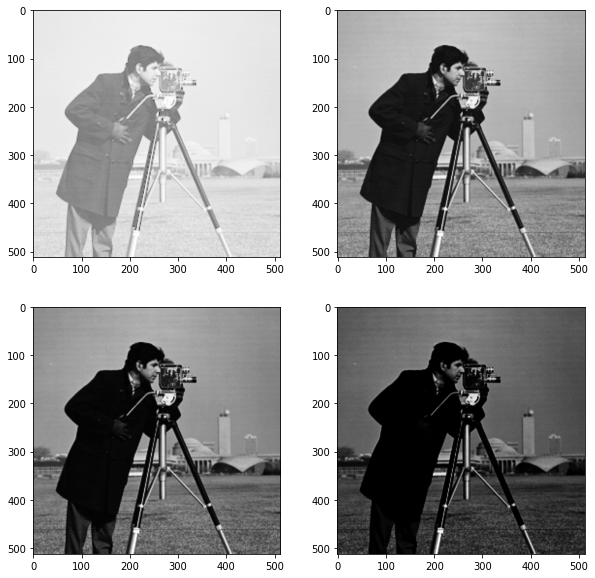

In [ ]:
img_copy2 = img.copy()

i = 1
plt.figure(figsize = (10,10))
for gamma in [0.2,0.8,1.2,2.2]:
    output = np.array((((img_copy2/255)**gamma)*255),dtype = 'uint8')
    plt.subplot(2,2,i)
    plt.imshow(output,cmap='gray')
    i=i+1


Students have to comment on the enhancement results obtained for gamma less than 1 and gamma > 1
 1. Gamma > 1 = Darker
 2. Gamma < 1 = Brighter

# Thresholding

Thresholding: is simplest method of segmentation in order to isolate the object from the background <br>



#Equation to implement thresholding
 s=L-1 for r > threshold<br> 
and s= 0 for r < threshold

Threshold = 128


Text(0.5, 1.0, 'Binary Image with For loop')

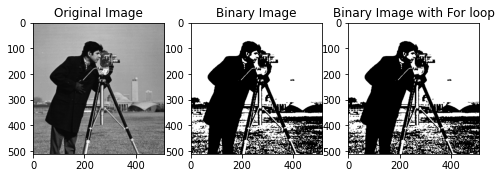

In [ ]:
# read the cameraman.tif image as img1
img1 = io.imread('cameraman.tif')    #reading and saving the image as array in 'img1'
img1_copy = img1.copy()
img1_copy2 = img1.copy()

T = int(input("Threshold = "))

#Method 1
img1_copy[img1_copy>T] = 255
img1_copy[img1_copy<T] = 0

#Method 2
r,c = img1.shape
for i in range(r):
    for j in range(c):
        if img1_copy2[i,j]>T:
            img1_copy2[i,j] = 255
        else:
            img1_copy2[i,j] = 0

plt.figure(figsize = (8,8))
#Display
plt.subplot(131)
plt.imshow(img1,cmap = 'gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(img1_copy,cmap = 'gray')
plt.title('Binary Image')

plt.subplot(133)
plt.imshow(img1_copy2,cmap = 'gray')
plt.title('Binary Image with For loop')


#Digital Negative

Text(0.5, 1.0, 'Digital Image')

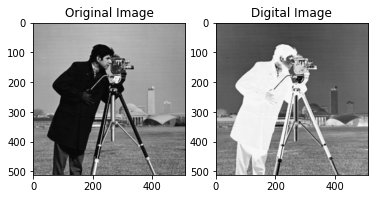

In [ ]:
# read the cameraman.tif image as img2
img2 = io.imread('cameraman.tif')
img2_copy = img2.copy()

r,c = img2.shape
for i in range(r):
    for j in range(c):
        img2_copy[i,j] = 255 - img2_copy[i,j]

#Display
plt.subplot(121)
plt.imshow(img2,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(img2_copy,cmap = 'gray')
plt.title('Digital Image')

# Contrast stretching using Piecewise-Linear Transformation Functions<br>

Concept:<br>
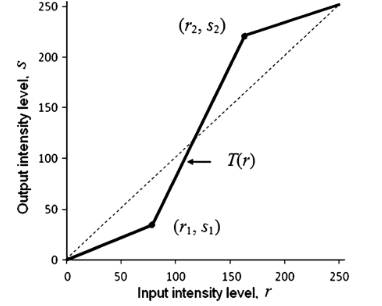

With (r1, s1), (r2, s2) as parameters, the function stretches the intensity levels <br>
Contrast stretching decreases the intensity of the dark pixels and increases the intensity of the light pixels. <br>
If r1 = s1 = 0 and r2 = s2 = L-1, the function becomes a straight dotted line in the graph (which gives no effect).

# Equation for contrast Stretching to be implemented

$Slope 1 = (s1-0)/(r1-0)$<br>
$Slope 2 = (s2-s1)/(r2-r1)$<br>
$Slope 3 = (255-s2)/(255-r2)$<br>

$Input pixel = r$ <br>
$Output pixel, S $<br>

S = Slope1.r,                 0 $\le$ r $\le$ r1<br>
  = Slope 2.(r-r1)+s1,        r1$\le$r$\le$r2<br>
  = Slope3 (r-r2)+s2,         r2$\le$r$\le$L-1  



Text(0.5, 1.0, 'Contrast Stretched Image')

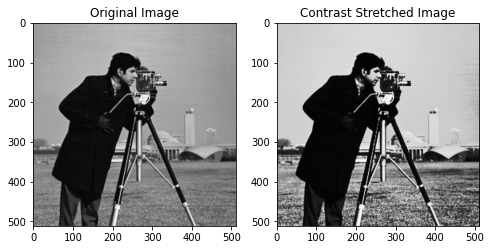

In [ ]:
# read the cameraman.tif image as img3
img3 = io.imread('cameraman.tif')
img3_copy = img3.copy()

r,c = img3.shape

r1 = 100
s1 = 50     # Making dark shades darker
r2 = 150
s2 = 200    # Making light shades lighter
l = 255     # Size of the image

slope1 = s1/r1
slope2 = (s2-s1)/(r2-r1)
slope3 = (l-s2)/(l-r2)

for i in range(r):
    for j in range(c):
        if img3_copy[i,j] <= r1:
            img3_copy[i,j] = slope1 * img3_copy[i,j]
        elif r1 < img3_copy[i,j] <= r2:
            img3_copy[i,j] = slope2 * (img3_copy[i,j] - r1) + s1
        else:
            img3_copy[i,j] = slope3 * (img3_copy[i,j] - r2) + s2

plt.figure(figsize = (8,8))
#Display
plt.subplot(121)
plt.imshow(img3,cmap = 'gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(img3_copy,cmap = 'gray')
plt.title('Contrast Stretched Image')


Plot the figures for thresholding and contrast stretching

Text(0.5, 1.0, 'Contrast Stretching')

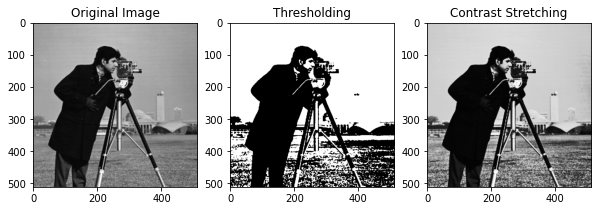

In [ ]:
plt.figure(figsize = (10,10))
#Display
plt.subplot(131)
plt.imshow(img3,cmap = 'gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(img1_copy,cmap = 'gray')
plt.title('Thresholding')

plt.subplot(133)
plt.imshow(img3_copy,cmap = 'gray')
plt.title('Contrast Stretching')


# Conclusion
1. We implemented the code for image enhancement using point processing methods such as digital negative, power law transformation, thresholding and contrast stretching.
2. Thresholding is used to convert any gray scale image into binary image.
3. Power law transformation is used to darken a bleached image by setting gamma greater than 1 and brighten a dark for gamma less than 1.
4. Digital Negative reverses the grey shades, so dark gray become light gray and vice versa. Typically, used to create X-ray images.
5. Contrast Stretching allows us to adjust the different shades based upon user defined values and original image.